## Statistical Testing

In order to test our hypothesis, we need to conduct statistical tests to determine whether our independent variable which is investor attention (name_price_attentino) has a statistically significant relationship with the target variable of returns (pct_return)

### Data Prepping 

Adding the dataframe we will be working with - which is the combined dataframe which includes financial information as well as the attention proxies


In [38]:
import pandas as pd 
import numpy as np
df = pd.read_csv("combined_crypto_data.csv", index_col=0)
df.head()

,Date,Price,Volume,Market_cap,crypto_name,crypto_price
0,2023-12-31,0.223147,2.946115e+07,1.786535e+09,Algorand,9.66
1,2023-12-30,0.221633,2.982879e+07,1.774411e+09,Algorand,0.00
2,2023-12-29,0.226712,6.161765e+07,1.815082e+09,Algorand,6.09
3,2023-12-28,0.233802,6.306787e+07,1.871838e+09,Algorand,0.00
4,2023-12-27,0.229015,4.023982e+07,1.833514e+09,Algorand,8.82


In [39]:
# rename crypto_price to attention
df.rename(columns={"crypto_price": "attention"}, inplace=True)
df.head()

,Date,Price,Volume,Market_cap,crypto_name,attention
0,2023-12-31,0.223147,2.946115e+07,1.786535e+09,Algorand,9.66
1,2023-12-30,0.221633,2.982879e+07,1.774411e+09,Algorand,0.00
2,2023-12-29,0.226712,6.161765e+07,1.815082e+09,Algorand,6.09
3,2023-12-28,0.233802,6.306787e+07,1.871838e+09,Algorand,0.00
4,2023-12-27,0.229015,4.023982e+07,1.833514e+09,Algorand,8.82


We see daily volatility is not in the dataset, therefore adding it using the formula
$$
\text{Daily Volatility} = \text{Daily Close} - \text{Daily Open}
$$

Daily volatility along wiht market cap and volume can behave as controls

In [34]:
df['day-to-day_volatility'] = df['Price'].shift(-1) - df['Price'].shift(1)
df.head()

,Date,Price,Volume,Market_cap,crypto_name,attention,day-to-day_volatility
0,2023-12-31,0.223147,2.946115e+07,1.786535e+09,Algorand,9.66,NaN
1,2023-12-30,0.221633,2.982879e+07,1.774411e+09,Algorand,0.00,0.003566
2,2023-12-29,0.226712,6.161765e+07,1.815082e+09,Algorand,6.09,0.012169
3,2023-12-28,0.233802,6.306787e+07,1.871838e+09,Algorand,0.00,0.002302
4,2023-12-27,0.229015,4.023982e+07,1.833514e+09,Algorand,8.82,0.001042


In [40]:
def calculate_volatility(group):
    group['day-to-day_volatility'] = group['Price'].shift(-1) - group['Price'].shift(1)
    return group

df = df.groupby('crypto_name').apply(calculate_volatility)
df.head()

/var/folders/hp/hkpqf03x0qdg7_8s3s9sy7gw0000gn/T/ipykernel_53970/2272813703.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('crypto_name').apply(calculate_volatility)


Date     Price        Volume    Market_cap crypto_name  \
crypto_name                                                                   
Algorand    0  2023-12-31  0.223147  2.946115e+07  1.786535e+09    Algorand   
            1  2023-12-30  0.221633  2.982879e+07  1.774411e+09    Algorand   
            2  2023-12-29  0.226712  6.161765e+07  1.815082e+09    Algorand   
            3  2023-12-28  0.233802  6.306787e+07  1.871838e+09    Algorand   
            4  2023-12-27  0.229015  4.023982e+07  1.833514e+09    Algorand   

               attention  day-to-day_volatility  
crypto_name                                      
Algorand    0       9.66                    NaN  
            1       0.00               0.003566  
            2       6.09               0.012169  
            3       0.00               0.002302  
            4       8.82               0.001042

In [41]:
df.reset_index(drop=True, inplace=True)
df.head()

,Date,Price,Volume,Market_cap,crypto_name,attention,day-to-day_volatility
0,2023-12-31,0.223147,2.946115e+07,1.786535e+09,Algorand,9.66,NaN
1,2023-12-30,0.221633,2.982879e+07,1.774411e+09,Algorand,0.00,0.003566
2,2023-12-29,0.226712,6.161765e+07,1.815082e+09,Algorand,6.09,0.012169
3,2023-12-28,0.233802,6.306787e+07,1.871838e+09,Algorand,0.00,0.002302
4,2023-12-27,0.229015,4.023982e+07,1.833514e+09,Algorand,8.82,0.001042


Creating X and y for statistical testing as well as to split for training and testing

In [62]:
nan_marketcap_rows = df[df['Market_cap'].isnull()]
print(nan_marketcap_rows)

Empty DataFrame
Columns: [Date, Price, Volume, Market_cap, crypto_name, attention, day-to-day_volatility]
Index: []


In [51]:
nan_marketcap_rows = df[df['Market_cap'].isnull()]

grouped_nan_marketcap = nan_marketcap_rows.groupby('crypto_name')

# To view the first entries in each group
print(grouped_nan_marketcap.first())

                   Date      Price        Volume  Market_cap  attention  \
crypto_name                                                               
Cardano      2017-10-17   0.000000  2.336180e+06         NaN       0.00   
Chainlink    2017-11-08   0.176479  3.347920e+06         NaN       0.00   
Dogecoin     2017-04-02   0.000491  4.226544e+06         NaN       0.00   
Filecoin     2020-10-14  30.216922  1.555853e+08         NaN       0.00   
Stellar      2015-12-28        NaN           NaN         NaN       0.69   

             day-to-day_volatility  
crypto_name                         
Cardano                  -0.026845  
Chainlink                -0.059095  
Dogecoin                 -0.000091  
Filecoin                -27.728868  
Stellar                   0.000149  


In [53]:
nan_rows = df[df.isnull().any(axis=1)]

# Get the names of the cryptos that have NaNs
crypto_names_with_nans = nan_rows['crypto_name'].unique()
print("Cryptos with NaNs:", crypto_names_with_nans)

# Calculate how many NaNs in each column for each crypto
nan_counts = nan_rows.groupby('crypto_name').apply(lambda x: x.isnull().sum())
nan_counts

Cryptos with NaNs: ['Algorand' 'Avalanche' 'Cardano' 'Chainlink' 'Cosmos' 'Dogecoin'
 'Filecoin' 'Polkadot' 'Polygon' 'Solana' 'Stacks' 'Stellar' 'Terra'
 'Uniswap' 'VeChain']


/var/folders/hp/hkpqf03x0qdg7_8s3s9sy7gw0000gn/T/ipykernel_53970/3720100082.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_counts = nan_rows.groupby('crypto_name').apply(lambda x: x.isnull().sum())


,Date,Price,Volume,Market_cap,crypto_name,attention,day-to-day_volatility
crypto_name,,,,,,,
Algorand,0,0,0,0,0,0,2
Avalanche,0,0,0,0,0,0,2
Cardano,0,0,8,25,0,0,2
Chainlink,0,0,0,49,0,0,2
Cosmos,0,0,0,0,0,0,2
Dogecoin,0,1,1,2,0,0,4
Filecoin,0,0,0,1036,0,0,2
Polkadot,0,0,0,0,0,0,2
Polygon,0,0,0,0,0,0,2


In [57]:
df_file = df[df['crypto_name']=='Filecoin']

# print its shape
print(df_file.shape)


(2209, 7)


In [49]:
print(grouped)

In [58]:
df.dropna(inplace=True)

In [65]:
df.to_csv("combined_crypto_data.csv")
df.head()

,Date,Price,Volume,Market_cap,crypto_name,attention,day-to-day_volatility
1,2023-12-30,0.221633,2.982879e+07,1.774411e+09,Algorand,0.00,0.003566
2,2023-12-29,0.226712,6.161765e+07,1.815082e+09,Algorand,6.09,0.012169
3,2023-12-28,0.233802,6.306787e+07,1.871838e+09,Algorand,0.00,0.002302
4,2023-12-27,0.229015,4.023982e+07,1.833514e+09,Algorand,8.82,0.001042
5,2023-12-26,0.234844,6.093416e+07,1.880180e+09,Algorand,0.00,0.009051


In [28]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [59]:
fix_seed = 42

X = df[['attention']]
y = df['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=fix_seed)


### OLS Regression Analysis 

OLS regression helps to understand how one or more independent variables predict the outcome of a dependent variable, by minimizing the sum of the squared differences between the observed and predicted values.

We will run 8 models which will be various combinations of the 4 independent variables we are focusing on - attention, market cap, volume and volatility 

* model 1 - attention only 
* model 2 - attention plus mkt cap
* model 3 - attention plus volume
* model 4 - attention plus volatility
* model 5 - attention plus mkt cap and volume 
* model 6 - attention plus mkt cap and volatility
* model 7 - attention plus volatility and volume 
* model 8 - all 4 


add anomolies durign regression 
end - display the regresssion table/summary 

#### Model 1: Attention Only

In [63]:
# Adding a constant term to the model (intercept)
X = sm.add_constant(X) 

# Fit the OLS model
model = sm.OLS(y, X)
result = model.fit()

# Print the summary of the regression results
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     6438.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:51:24   Log-Likelihood:            -1.1567e+05
No. Observations:               26731   AIC:                         2.313e+05
Df Residuals:                   26729   BIC:                         2.314e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9519      0.127     23.174      0.0

The OLS Analysis aims to explore the relationship between the independent variable name_price_attention and the target variable pct_return. While findings such as the R-square value show that the model is not a good fit, the p-value of less than 0.05 for the variable indicates a statistically significant association between our independent and dependent variable while keeping other values not included in the model constant. This suggests that, while minimal, there is a noticeable impact of changes in name_price_attention on the return.

Now adding controls and seeing how that impacts the p-value for our attention variable

#### Model 2: Attention and Market cap

Looking at controls such as volume, volatility and mkt_cap, let us see if that improves the model or impacts the p-value


In [53]:
#model 2: attention and market cap
# Adding a constant term to the model (intercept)
X2 = df[['name_price_attention', 'mkt_cap']]
X2 = sm.add_constant(X2) 

# Fit the OLS model
model2 = sm.OLS(y, X2)
m2_result = model2.fit()

# Print the summary of the regression results
print(m2_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.666
Date:                Sat, 02 Mar 2024   Prob (F-statistic):            0.00127
Time:                        12:24:11   Log-Likelihood:             1.6768e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64005   BIC:                        -3.353e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0003 

#### Model 3: Attention and Volume


In [54]:
#model 3: attention and volume
# Adding a constant term to the model (intercept)
X3 = df[['name_price_attention', 'volume']]
X3 = sm.add_constant(X3) 

# Fit the OLS model
model3 = sm.OLS(y, X3)
m3_result = model3.fit()

# Print the summary of the regression results
print(m3_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     13.81
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           1.00e-06
Time:                        12:24:14   Log-Likelihood:             1.6769e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64005   BIC:                        -3.353e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0006 

#### Model 4: Attention and Daily Volatility


In [55]:
# Adding a constant term to the model (intercept)
X4 = df[['name_price_attention', 'daily_volatility']]
X4 = sm.add_constant(X4) 

# Fit the OLS model
model4 = sm.OLS(y, X4)
m4_result = model4.fit()

# Print the summary of the regression results
print(m4_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                 1.233e+04
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:24:16   Log-Likelihood:             1.7810e+05
No. Observations:               64008   AIC:                        -3.562e+05
Df Residuals:                   64005   BIC:                        -3.562e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

#### Model 5: Attention, Market Cap and Volume


In [56]:
# Adding a constant term to the model (intercept)
X5 = df[['name_price_attention', 'mkt_cap', 'volume']]
X5 = sm.add_constant(X5) 

# Fit the OLS model
model5 = sm.OLS(y, X5)
m5_result = model5.fit()

# Print the summary of the regression results
print(m5_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     18.45
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           5.89e-12
Time:                        12:24:17   Log-Likelihood:             1.6770e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64004   BIC:                        -3.354e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

#### Model 6: Attention, Market Cap and Daily Volatility

In [57]:
# Adding a constant term to the model (intercept)
X6 = df[['name_price_attention', 'mkt_cap', 'daily_volatility']]
X6 = sm.add_constant(X6) 

# Fit the OLS model
model6 = sm.OLS(y, X6)
m6_result = model6.fit()

# Print the summary of the regression results
print(m6_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     8219.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:24:18   Log-Likelihood:             1.7811e+05
No. Observations:               64008   AIC:                        -3.562e+05
Df Residuals:                   64004   BIC:                        -3.562e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0003 

#### Model 7: Attention and Daily Volatility


In [58]:
# Adding a constant term to the model (intercept)
X7 = df[['name_price_attention', 'daily_volatility', 'volume']]
X7 = sm.add_constant(X7) 

# Fit the OLS model
model7 = sm.OLS(y, X7)
m7_result = model5.fit()

# Print the summary of the regression results
print(m7_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     18.45
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           5.89e-12
Time:                        12:24:20   Log-Likelihood:             1.6770e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64004   BIC:                        -3.354e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

#### Model 8: Attention, Market Cap, Volume and Volatility


In [59]:
# Adding a constant term to the model (intercept)
X8 = df[['name_price_attention', 'mkt_cap','daily_volatility', 'volume']]
X8 = sm.add_constant(X8) 

# Fit the OLS model
model8 = sm.OLS(y, X8)
m8_result = model8.fit()

# Print the summary of the regression results
print(m8_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     6177.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:24:23   Log-Likelihood:             1.7812e+05
No. Observations:               64008   AIC:                        -3.562e+05
Df Residuals:                   64003   BIC:                        -3.562e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

### Regression

Based on the Pearson Correlation and some prior visualizations, we can determine that the data is non-linear therefore Linear Regression is not an option for our data. Therefore we use XXX regression that is found inbuilt in the statsmodels library in Python

About the regression model: XXX

In [60]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [86]:
#importing our df
df = pd.read_csv("combined_financial_data.csv", index_col=0)
df['daily_volatility'] = df['price'] - df['open']
df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,ticker_attention,name_price_attention,daily_volatility
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.25,3.15,-0.190
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,3.38,1.54,-0.290
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,4.03,2.24,-0.720
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,4.94,1.19,0.085
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,5.33,1.68,-0.240


In [87]:
df_test = pd.read_csv("quarterly_financial_data_2013_2023.csv")


#df_test = df_test.rename(columns = {'datedate': 'date'})
df_test['date'] = df_test['datadate']
df_test['ticker'] = df_test['tic']
df_test.head()

,gvkey,datadate,fqtr,tic,conm,net_income,revenue,total_assets,shareholders_equity,total_liabilities,total_debt,sales,operating_activities_cf,capital_expenditures,interest_expense,common_shares_outstanding,earnings_per_share,dividends_per_share,date,ticker
0,1690,2013-03-31,2,AAPL,APPLE INC,9547.0,43603.0,194743.0,135490.0,59253.0,0.0,43603.0,35930.0,4325.0,0.0,940.094,10.16,2.65,2013-03-31,AAPL
1,1690,2013-06-30,3,AAPL,APPLE INC,6900.0,35323.0,199856.0,123354.0,76502.0,16958.0,35323.0,43758.0,6210.0,53.0,908.442,7.51,3.05,2013-06-30,AAPL
2,1690,2013-09-30,4,AAPL,APPLE INC,7512.0,37472.0,207000.0,123549.0,83451.0,16960.0,37472.0,53666.0,8165.0,83.0,899.213,8.31,3.05,2013-09-30,AAPL
3,1690,2013-12-31,1,AAPL,APPLE INC,13072.0,57594.0,225184.0,129684.0,95500.0,16961.0,57594.0,22670.0,1985.0,84.0,892.447,14.59,3.05,2013-12-31,AAPL
4,1690,2014-03-31,2,AAPL,APPLE INC,10223.0,45646.0,205989.0,120179.0,85810.0,16962.0,45646.0,36208.0,3367.0,85.0,861.745,11.69,3.05,2014-03-31,AAPL


In [93]:
anomalies_df = pd.merge(df, df_test[['date','ticker','revenue', 'total_assets', 'earnings_per_share']], on=['date', 'ticker'], how = 'left')
anomalies_df['book_to_market'] = anomalies_df['total_assets'] / anomalies_df['mkt_cap']
anomalies_df['dt_date'] = pd.to_datetime(anomalies_df['date'])
anomalies_df['jan_dummy'] = (anomalies_df['dt_date'].dt.month == 1).astype(int)
anomalies_df['monday_dummy'] = (anomalies_df['dt_date'].dt.dayofweek == 0).astype(int)
anomalies_df['annual_rep_release'] = anomalies_df['book_to_market'].notna().astype(int)
anomalies_df['log returns'] = np.log1p(anomalies_df['return']) 
#anomalies_df['log returns'] = anomalies_df['log returns'].fillna(0, inplace=True)
#anomalies_df[anomalies_df['book_to_market'].notna()].head()

anomalies_df.head()
#anomalies_df.to_csv('anomalies_df.csv')

,date,permno,ticker,price,volume,return,high,low,open,avg_price,...,daily_volatility,revenue,total_assets,earnings_per_share,book_to_market,dt_date,jan_dummy,monday_dummy,annual_rep_release,log returns
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,...,-0.190,NaN,NaN,NaN,NaN,2014-01-02,1,0,0,-0.006705
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,...,-0.290,NaN,NaN,NaN,NaN,2014-01-03,1,0,0,-0.006751
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,...,-0.720,NaN,NaN,NaN,NaN,2014-01-06,1,1,0,-0.021359
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,...,0.085,NaN,NaN,NaN,NaN,2014-01-07,1,0,0,0.007720
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,...,-0.240,NaN,NaN,NaN,NaN,2014-01-08,1,0,0,-0.018013


In [94]:
list(anomalies_df.columns)

['date',
 'permno',
 'ticker',
 'price',
 'volume',
 'return',
 'high',
 'low',
 'open',
 'avg_price',
 'mkt_cap',
 'pct_return',
 'ticker_attention',
 'name_price_attention',
 'daily_volatility',
 'revenue',
 'total_assets',
 'earnings_per_share',
 'book_to_market',
 'dt_date',
 'jan_dummy',
 'monday_dummy',
 'annual_rep_release',
 'log returns']

### Inluding anomalies 

##### model 9: attention, market cap

In [103]:
# including the anomaly annual report release 
anomalies_df['annual_rep_release'] = anomalies_df['annual_rep_release'].fillna(0)


# Assuming 'y' is your dependent variable
X10 = anomalies_df[['name_price_attention', 'annual_rep_release']]
X10 = sm.add_constant(X10)

# Fit the OLS model
model10 = sm.OLS(y, X10)
m10_result = model10.fit()  # Corrected to use 'model10'

# Print the summary of the regression results
print(m10_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.556
Date:                Sat, 02 Mar 2024   Prob (F-statistic):            0.00386
Time:                        17:50:21   Log-Likelihood:             1.6768e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64005   BIC:                        -3.353e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

In [105]:
# including the anomaly Jan effect
anomalies_df['jan_dummy'] = anomalies_df['jan_dummy'].fillna(0)


# Assuming 'y' is your dependent variable
X11 = anomalies_df[['name_price_attention', 'jan_dummy']]
X11 = sm.add_constant(X11)

# Fit the OLS model
model11 = sm.OLS(y, X11)
m11_result = model11.fit()  

# Print the summary of the regression results
print(m11_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.483
Date:                Sat, 02 Mar 2024   Prob (F-statistic):            0.00153
Time:                        17:58:59   Log-Likelihood:             1.6768e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64005   BIC:                        -3.353e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0005 

In [ ]:
# Filter the original DataFrame to include only rows where 'earnings_per_share' is not NaN
df_with_earnings = anomalies_df[anomalies_df['earnings_per_share'].notna()]

# Adding a constant term to the model (intercept) including the anomaly earnings per share
X10 = anomalies_df[['name_price_attention', 'mkt_cap', 'daily_volatility', 'earnings_per_share']]
X10 = sm.add_constant(X10) 

# Fit the OLS model
model10 = sm.OLS(y, X10)
m10_result = model6.fit()

# Print the summary of the regression results
print(m10_result.summary())

### Trying OLS

In [100]:
import statsmodels.api as sm
df2 = anomalies_df.copy()
# Assuming df, response_column, and training_columns are already defined
# Create the design matrix X
#df2['pct_return_2'] = df[df['pct_return']]
X = anomalies_df['name_price_attention']
X = sm.add_constant(X)  # Add a constant term to the model (intercept)

# Create the target variable y
y = anomalies_df['return']

# Fit the OLS model
model = sm.OLS(y, X)
result = model.fit()

# Print the summary of the regression results
print(result.summary())




                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.507
Date:                Sat, 02 Mar 2024   Prob (F-statistic):            0.00205
Time:                        15:26:57   Log-Likelihood:             1.6768e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64006   BIC:                        -3.353e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

We see that the p-value of name_price_attention in 

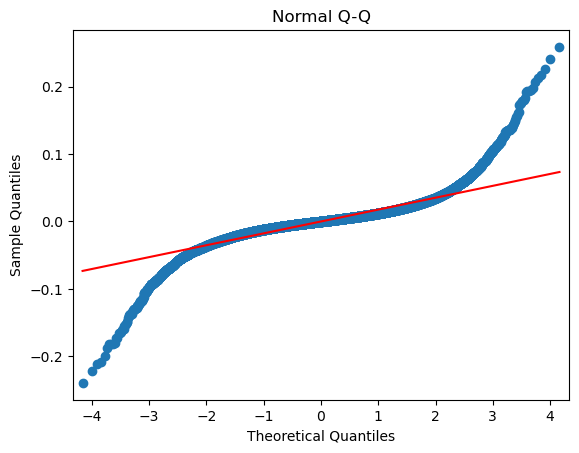

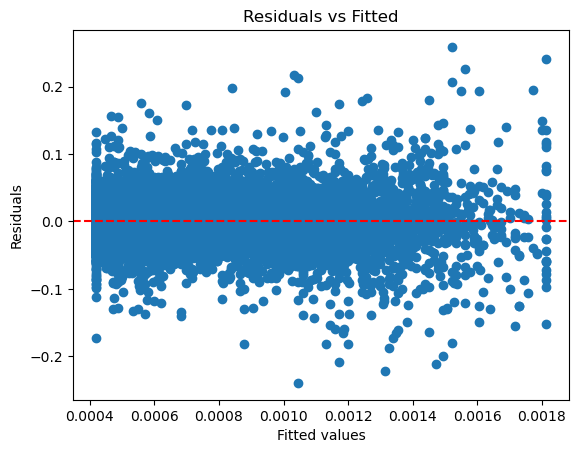

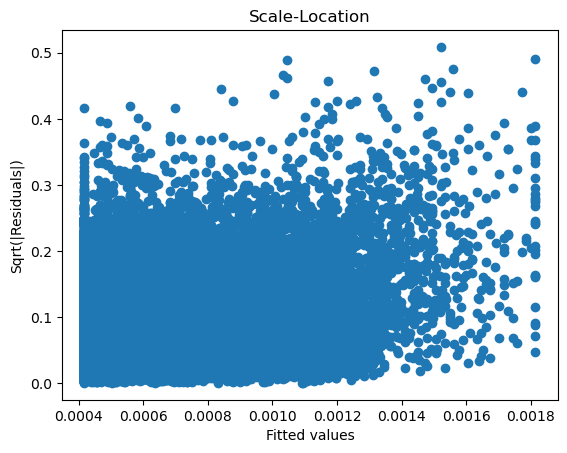

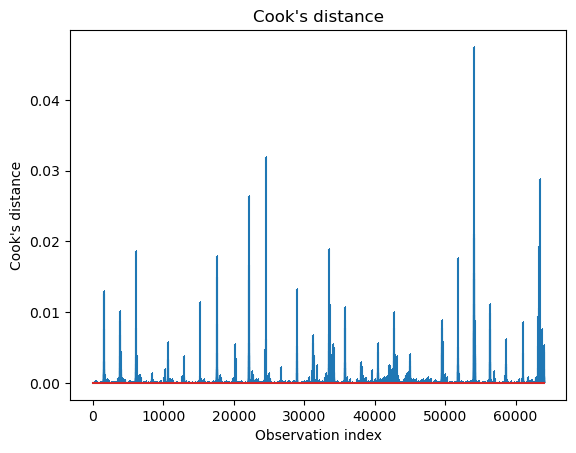

In [101]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Assuming `model_fitted` is your fitted OLS model from `model.fit()`
model_fitted = result  # Replace 'model' with your OLS model variable if it's named differently
residuals = model_fitted.resid

# Normal Q-Q plot
fig = sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q')
plt.show()

# Residual plot for homoscedasticity
plt.scatter(model_fitted.fittedvalues, residuals)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='dashed')
plt.show()

# Scale-Location plot for homoscedasticity
plt.scatter(model_fitted.fittedvalues, np.sqrt(np.abs(residuals)))
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(|Residuals|)')
plt.show()

# Cook's distance plot for influence
influence = model_fitted.get_influence()
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("Cook's distance")
plt.xlabel('Observation index')
plt.ylabel('Cook\'s distance')
plt.show()


In [102]:
import statsmodels.api as sm

# Assuming 'X' is your matrix of independent variables (with a constant added)
# and 'y' is your dependent variable.

# Add a constant to X if you haven't already done so
X = sm.add_constant(X)

# Create a robust linear model using Huber's T norm
rlm_model = sm.RLM(y, X, M=sm.robust.norms.HuberT())

# Fit the model
rlm_results = rlm_model.fit()

# Print the summary of the regression results
print(rlm_results.summary())


                    Robust linear Model Regression Results                    
Dep. Variable:                 return   No. Observations:                64008
Model:                            RLM   Df Residuals:                    64006
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 02 Mar 2024                                         
Time:                        15:27:02                                         
No. Iterations:                    24                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

In [34]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)  # Adjust alpha parameter
ridge.fit(X_train, y_train)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train) 

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


In [35]:

ridge = Ridge(alpha=1.0)  # Adjust alpha parameter
ridge.fit(X_train, y_train)


Ridge()

In [36]:
print('R squared training set', round(ridge.score(X_train, y_train)*100, 2))
print('R squared test set', round(ridge.score(X_test, y_test)*100, 2))


R squared training set 0.04
R squared test set -0.12


In [37]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = ridge.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = ridge.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))


MSE training set 0.0
MSE test set 0.0


### Gradient Boost Regressor

In [38]:
#splitting the data
from sklearn.model_selection import train_test_split

fix_seed = 32
#X = df['name_price_attention']  # Extracting the feature
X = df[['name_price_attention']]
y = df['pct_return']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=fix_seed)

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=fix_seed)
gb_regressor.fit(X_train, y_train)


GradientBoostingRegressor(random_state=32)

In [40]:
from sklearn.model_selection import cross_val_score

y_pred = gb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.893335084713147


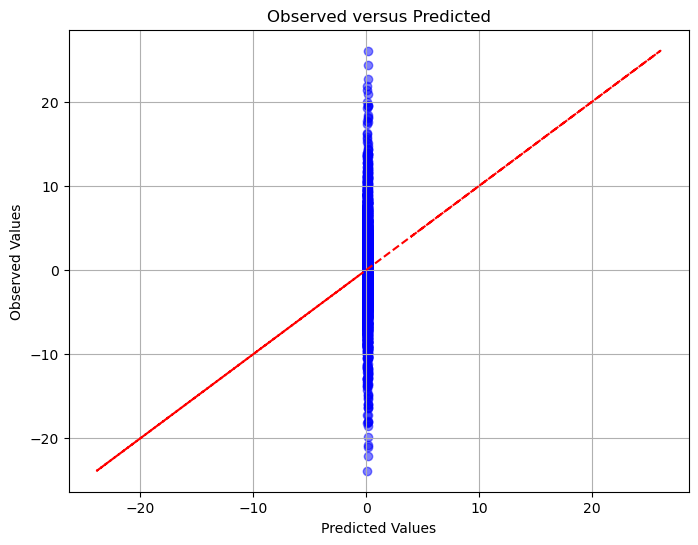

In [41]:
import matplotlib.pyplot as plt

# Plot observed versus predicted values
plt.figure(figsize=(8, 6))
plt.scatter(result.fittedvalues, y, color='blue', alpha=0.5)
plt.plot(y, y, color='red', linestyle='--')  # Plotting the identity line (y = x)
plt.title('Observed versus Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.grid(True)
plt.show()


From visualization and summary we can see that OLS is not a good fit - mostly for linear data and ours is non-linear

### 1 Polynomial Regression

In [42]:
import statsmodels.api as sm
import numpy as np

# Assuming df, response_column, and training_columns are already defined
df2 = df.copy()
X = df2['name_price_attention', 'ticker_attention']  # Extracting the feature
y = df2['return']

X = sm.add_constant(X)
X['attention_squared'] = X['name_price_attention'] ** 2
model = sm.OLS(y,X)
poly_model = model.fit()
print(poly_model.summary())


KeyError: ('name_price_attention', 'ticker_attention')

### 2. Generalized Additive Models (GAM):


In [ ]:
import statsmodels.api as sm

# Assuming df, response_column, and training_columns are already defined

# Fit GAM model
gam_model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

# Print summary
print(gam_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             pct_return   No. Observations:                64008
Model:                            GLM   Df Residuals:                    64007
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                          3.1062
Method:                          IRLS   Log-Likelihood:            -1.2710e+05
Date:                Wed, 28 Feb 2024   Deviance:                   1.9882e+05
Time:                        17:24:40   Pearson chi2:                 1.99e+05
No. Iterations:                     3   Pseudo R-squ. (CS):         -0.0001622
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
name_price_attention     0.0027 

### 3. Nonlinear Least Squares (NLS): (Using LOWESS as an example)


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Define the model function
def model_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the model to the data
params, covariance = curve_fit(model_func, X, y)

# Extract the parameter estimates
a_fit, b_fit, c_fit = params

# Print the parameter estimates
print("Parameter estimates:")
print("a:", a_fit)
print("b:", b_fit)
print("c:", c_fit)
print(covariance)


Parameter estimates:
a: -0.0680243333213499
b: 0.05660142901558837
c: 0.10150841046372718
[[ 0.0010105   0.00143246 -0.00095267]
 [ 0.00143246  0.0036397  -0.00174575]
 [-0.00095267 -0.00174575  0.00104376]]


### 4. Generalized Linear Models (GLM):

In [ ]:
import statsmodels.api as sm

# Assuming df, response_column, and training_columns are already defined

X = sm.add_constant(df[training_columns])  # Include constant term
y = df[response_column]

# Fit GLM model (e.g., with a gamma distribution and log link function)
glm_model = sm.GLM(y, X, family=sm.families.Gamma()).fit()

# Print summary
print(glm_model.summary())


### Medium trying to determine using shape 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
medium_trial = df[['date', 'return']]

medium_trial.head()

,date,return
0,2014-01-02,-0.006683
1,2014-01-03,-0.006728
2,2014-01-06,-0.021133
3,2014-01-07,0.007750
4,2014-01-08,-0.017852


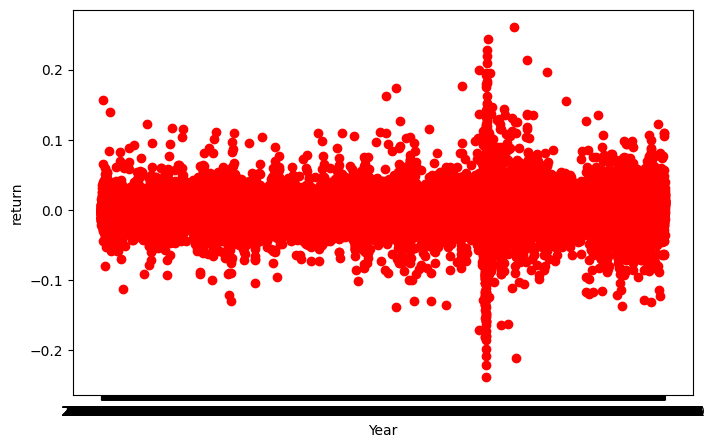

In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (medium_trial["date"].values, medium_trial["return"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('return')
plt.xlabel('Year')
plt.show()

### RandomForest

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split

fix_seed = 32
#X = df['name_price_attention']  # Extracting the feature
X = df[['name_price_attention']]
y = df['return']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=fix_seed)
type(X)

pandas.core.frame.DataFrame

In [ ]:
print(X_train)

       name_price_attention
37310                 27.30
38848                 24.08
57949                 13.64
24082                  8.64
13844                  0.00
...                     ...
20414                 21.12
60284                  5.00
9526                   1.65
42539                 26.65
10967                 27.28

[51206 rows x 1 columns]


In [ ]:
rf_regressor = RandomForestRegressor(random_state=fix_seed)


In [ ]:
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)


In [ ]:
#Statistical Testing

#Mean Squared Error (MSE): It measures the average squared difference between the predicted values and the actual values. Lower values indicate better model performance.

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.00031257620437574084


In [ ]:
#R-squared (Coefficient of Determination): It represents the proportion of variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit.

from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(r_squared)

-0.08497269005853236


In [ ]:
#Feature Importance: The RandomForestRegressor provides feature importances, which represent the relative importance of each feature in predicting the target variable.

importances = rf_regressor.feature_importances_
print(importances)

[1.]


In [ ]:
#Residual Analysis: Analyzing the residuals (the differences between predicted and actual values) can provide insights into model performance and uncover patterns or trends that the model may have missed.

residuals = y_test - y_pred


In [ ]:
#Mean Absolute Error (MAE): It measures the average absolute difference between the predicted values and the actual values.

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.01166923092272298


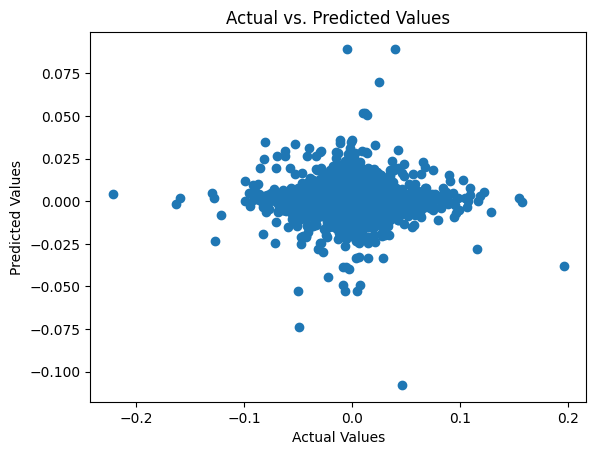

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, n_informative=2,
#                       random_state=0, shuffle=False)
regr = RandomForestRegressor(random_state=fix_seed)
regr.fit(X, y)
importances = regr.feature_importances_


# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
print(importances)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

[0.8910246  0.25864298 0.01687774 0.18063635 0.89257689 0.0142995
 0.92453382 0.12997104 0.09790944 0.02675424 0.91439547 0.26271135
 0.66617775 0.2082975  0.47286732 0.97613954 0.35028607 0.4283591
 0.98135169 0.01023588 0.27448729 0.24651913 0.66772163 0.12836319
 0.58793143 0.49858526 0.67060485 0.54406628 0.31925952 0.41392651
 0.49794919 0.27806216 0.09680165 0.8296418  0.86689879 0.0678669
 0.96792054 0.88339904 0.54370763 0.18516991 0.20832503 0.18470462
 0.7886272  0.96344831 0.34366138 0.08029241 0.54299538 0.08693732
 0.75101906 0.26404452 0.57499702 0.91491578 0.19866056 0.76187102
 0.05722313 0.96062719 0.5524682  0.44341824 0.13526514 0.71169031
 0.68060146 0.19453928 0.73960802 0.35595374 0.22188837 0.59052506
 0.56163231 0.72712806 0.2457124  0.7731483  0.89396356 0.79711506
 0.28527114 0.3216594  0.75164088 0.76867857 0.61369376 0.99417274
 0.82430007 0.94257479 0.22387647 0.11228766 0.43557614 0.24429197
 0.21906194 0.83483052 0.55808545 0.61181026 0.99908904 0.4896372

In [ ]:
df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,ticker_attention,name_price_attention
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.25,3.15
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,3.38,1.54
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,4.03,2.24
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,4.94,1.19
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,5.33,1.68


alex tesxz